In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import gym
import trading_env

# from agent_v2.spg_agent import StochasticPolicyGradientAgent

Loading historical data file


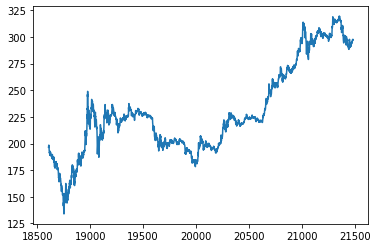

In [2]:
env_trading = gym.make('test_trading-v2')
NUM_EP = 400
date = datetime.datetime(2017, 7, 15, 0, 0)
data = env_trading.historical_data["close"]
env_trading.reset(date=date)
plt.plot(data[env_trading.start_index:env_trading.start_index + int(env_trading.episode_steps) 
              if env_trading.start_index + int(env_trading.episode_steps) < data.shape[0]
             else data.shape[0]])

plt.show()

Loading historical data file


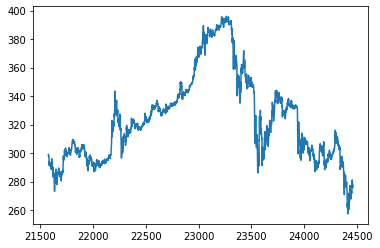

In [3]:
env_trading_test = gym.make('test_trading-v2')
date_test = datetime.datetime(2017, 8, 15, 0, 0)
data = env_trading_test.historical_data["close"]
env_trading_test.reset(date=date_test)
plt.plot(data[env_trading_test.start_index:env_trading_test.start_index + int(env_trading_test.episode_steps) 
              if env_trading_test.start_index + int(env_trading_test.episode_steps) < data.shape[0]
             else data.shape[0]])

plt.show()

## The Goal
Have a better cumulated reward and final portfolio value than the three following agents:
- The "holder" (action = 1)
- The "All out" (action = -1)
- The "I have no idea what I am doing" (random action)


# Holder

In [4]:
state = env_trading.reset(date=date)
total_reward = 0

while(True):
    action = 1.0 #Holder agent
    state, reward, done, _ = env_trading.step(action)
    total_reward += reward
    if done:
        break
print(total_reward)

50.67391531660589


# Holder (0.5)

In [5]:
state = env_trading.reset(date=date)
total_reward = 0

while(True):
    action = 0.5 #Holder agent
    state, reward, done, _ = env_trading.step(action)
    total_reward += reward
    if done:
        break
print(total_reward)

50.67391531660589


# Random

In [6]:
state = env_trading.reset(date=date)
total_reward = 0

while(True):
    action = env_trading.action_space.sample()[0]
    state, reward, done, _ = env_trading.step(action)
    total_reward += reward
    if done:  
        break
print(total_reward)

11.275623871007491


# All out

In [7]:
out_reward = np.full(NUM_EP, 0)

# Sharpe ratio

In [13]:
def calc_sharpe(rewards):
    return np.mean(rewards)/np.std(rewards)

# The Agent

### Stochastic Policy Gradient

In [36]:
agentSPG = StochasticPolicyGradientAgent(env_trading, learning_rate = 1e-4, 
                                               discount_rate = 0.99, batch_size = 64)

In [41]:
rewards_plot = []
for i in range( NUM_EP ):
    rewards = []
    rewards_test = []
    portfolio = []
    state = env_trading.reset(date=date)
    state = np.reshape(state,200)
    total_reward = 0

    while(True):
        action = agentSPG.act(state)
#         print(action)
        state, reward, done, _ = env_trading.step(action)
        rewards.append(reward)
        state = np.reshape(state,200)
        agentSPG.store_step(state, reward)
        total_reward += reward
        if done:
            rewards.append(total_reward)
#             portfolio.append(env_trading.portfolio_value)
            #print("Episode: {}, Total reward: {}".format(i,total_reward))
            break
    rewards_plot.append(total_reward)
    agentSPG.train()

    state_test = env_trading.reset( date = datetime.datetime(2017, 8, 15, 0, 0) )
    state_test = np.reshape( state_test, 200 )
    total_reward_test = 0

    while( True ):
        action = agentSPG.act(state_test)
#         print(action)
        state_test, reward_test, done_test, _ = env_trading.step(action)
        rewards_test.append(reward_test)
        state_test = np.reshape(state_test,200)
#         agentSPG.store_step(action, state, reward)
        total_reward_test += reward_test
        if done_test:
            rewards_test.append(total_reward_test)
            portfolio.append(env_trading.portfolio_value)
            print("Episode: {}, Training reward: {}, Testing reward: {}".format(i, total_reward, total_reward_test))
#             print("Episode: {}, Training Sharpe: {}, Testing Sharpe: {}".format(i, calc_sharpe(rewards), calc_sharpe(rewards_test)))
            break

Episode: 0, Training reward: -18.831779189807566, Testing reward: -3.13012437757226
Episode: 1, Training reward: -4.677466381988442, Testing reward: 0.9430455388827589
Episode: 2, Training reward: 28.821469754743077, Testing reward: 0.7406834254810728
Episode: 3, Training reward: 26.150541691110792, Testing reward: -26.126759446070388
Episode: 4, Training reward: -20.74872775996644, Testing reward: 16.42507756526433
Episode: 5, Training reward: -15.492603942275505, Testing reward: -0.625185561570561
Episode: 6, Training reward: 15.774671944278447, Testing reward: -2.8325713653287834
Episode: 7, Training reward: 39.047676075746494, Testing reward: 6.316342734858706
Episode: 8, Training reward: 23.456212089402808, Testing reward: -7.779394034265662
Episode: 9, Training reward: -19.23399693215208, Testing reward: -21.63261296459498
Episode: 10, Training reward: 28.938683502400163, Testing reward: 8.762592665827084
Episode: 11, Training reward: 29.073099640722972, Testing reward: -13.60015

In [42]:
import matplotlib.pyplot as plt

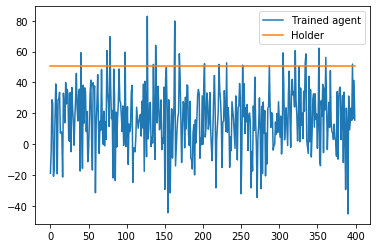

In [45]:
plt.plot(rewards_plot, label = "Trained agent")
plt.plot(holder_reward, label = "Holder")
# plt.plot(random_reward, label = "Random")
# plt.plot(out_reward, label = "All out")
plt.legend()
plt.show()

### Deep Q Network

In [46]:
from agent_v2.dqn_agent import DQNAgent

In [47]:
agentDQN = DQNAgent(env_trading, alpha = 1e-4, epsilon_log_decay = 0.8)

In [48]:
rewards_plot = []
rewards_plot_test = []

date = datetime.datetime(2017, 7, 15, 0, 0)
date_test = datetime.datetime(2017, 8, 15, 0, 0)

for e in range(NUM_EP):

    state = np.reshape(env_trading.reset(date=date), [1, 200])
    state_test = np.reshape(env_tradibng_test.reset(date=date_test), [1, 200])
    score = 0
    score_test = 0
    
    while(True):
        action = agentDQN.act(state, step = e)
        next_state, reward, done, _ = env_trading.step(action - 1) #Converting class to action
        next_state = np.reshape(next_state, [1, 200])

        agentDQN.store_step(state, action, reward, next_state, done)

        state = next_state

        score += reward

        if done:
            rewards_plot.append(score)
            print("Episode: {}, Total reward: {}".format(e, score))
            break
            
    while(True):
        action_test = agentDQN.act(state_test)
        state_test, reward_test, done_test, _ = env_trading_test.step(action_test - 1) #Converting class to action
        state_test = np.reshape(state_test, [1, 200])
        score_test += reward_test
        if done_test:
            rewards_plot_test.append(score_test)
            print("Final test cumulated reward: {}".format(score_test))
            break
    
    agentDQN.train()

Episode: 0, Total reward: 0.0
Final test cumulated reward: 0.0


RuntimeError: invalid argument 4: Index tensor must have same dimensions as input tensor at C:/w/1/s/tmp_conda_3.8_075429/conda/conda-bld/pytorch_1579852542185/work/aten/src\THC/generic/THCTensorScatterGather.cu:16

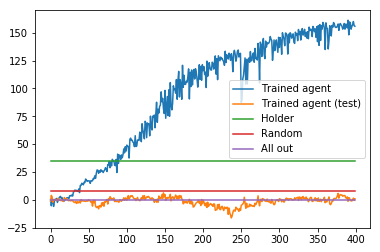

In [12]:
plt.plot(rewards_plot, label = "Trained agent")
plt.plot(rewards_plot_test, label = "Trained agent (test)")
plt.plot(holder_reward, label = "Holder")
plt.plot(random_reward, label = "Random")
plt.plot(out_reward, label = "All out")
plt.legend()
plt.show()

The DQN agent is able to have a greater cumulated reward than the 3 other agents.

### Testing

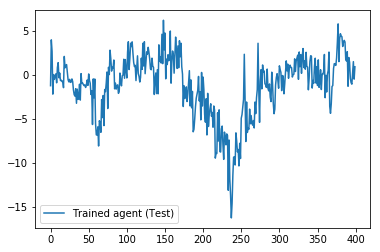

In [13]:
plt.plot(rewards_plot_test, label = "Trained agent (Test)")
plt.legend()
plt.show()

### DDPG

In [14]:
agentDDPG = agent.DDPGAgent(env_trading, epsilon_log_decay=0.99, tau = 0.001, actor_lr = 1e-4, critic_lr = 1e-4) #Do not run after running DQN, to correct!

Defining exploration noise

In [15]:
# Ornstein-Uhlenbeck noise by lirnli/OpenAI-gym-solutions

def UONoise():
    theta = 0.15
    sigma = 0.2
    state = 0
    while True:
        yield state
        state += -theta*state+sigma*np.random.randn()

In [16]:
date = datetime.datetime(2017, 7, 10, 0, 0)
noise = UONoise()
scores = []

for e in range(NUM_EP):
    state = np.reshape(env_trading.reset(date=date), 200)
    score = 0
    p = e/NUM_EP

    while(True):
        action = agentDDPG.actor.act([state], step = e)
        next_state, reward, done, _ = env_trading.step(action)
        next_state = np.reshape(next_state, 200)
        score += reward
        
        agentDDPG.store_step(state, action, reward, next_state, done)

        if done:
            agentDDPG.train()
            scores.append(score)
            print("Episode: {}, Total reward: {}".format(e, score))
            break
        state = next_state

Episode: 0, Total reward: 6.258354259229879
Episode: 1, Total reward: -3.123779368576969
Episode: 2, Total reward: 37.58316073478678
Episode: 3, Total reward: 22.697490482116695
Episode: 4, Total reward: 13.162220699576189
Episode: 5, Total reward: 41.28304999442916
Episode: 6, Total reward: 34.061357449210725
Episode: 7, Total reward: 29.77453684547052
Episode: 8, Total reward: 42.70248852783395
Episode: 9, Total reward: 30.290771796724062
Episode: 10, Total reward: 36.248455677378246
Episode: 11, Total reward: 32.31878562902604
Episode: 12, Total reward: -0.5831352909257095
Episode: 13, Total reward: -2.2215735741544056
Episode: 14, Total reward: 0.4936868839085353
Episode: 15, Total reward: -1.555901199971976
Episode: 16, Total reward: 0.19709286578231477
Episode: 17, Total reward: 10.538691057266021
Episode: 18, Total reward: 13.909619850705672
Episode: 19, Total reward: 11.038506367188255
Episode: 20, Total reward: 15.725583850946391
Episode: 21, Total reward: 14.703204093503516
E

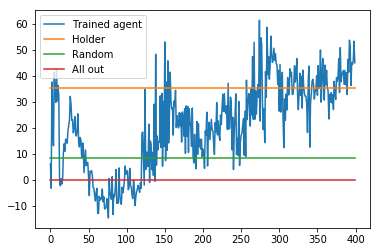

In [17]:
plt.plot(scores, label = "Trained agent")
plt.plot(holder_reward, label = "Holder")
plt.plot(random_reward, label = "Random")
plt.plot(out_reward, label = "All out")
plt.legend()
plt.show()

### Testing

In [19]:
date = datetime.datetime(2017, 8, 15, 0, 0) # Next month
state = np.reshape(env_trading.reset(date=date), 200)
score = 0
while(True):
    action = agentDDPG.actor.act([state])
    state, reward, done, _ = env_trading.step(action)
    state = np.reshape(state, 200)
    score += reward
    if done:
        print("Final cumulated reward: {}".format(score))
        break

Final cumulated reward: 17.405727973013697


In [20]:
date = datetime.datetime(2017, 8, 15, 0, 0) # Next month
state = np.reshape(env_trading.reset(date=date), 200)
score = 0
while(True):
    action = env_trading.action_space.sample()
    state, reward, done, _ = env_trading.step(action)
    state = np.reshape(state, 200)
    score += reward
    if done:
        print("Final cumulated reward: {}".format(score))
        break

Final cumulated reward: [2.640651]
